In [1]:
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
import numpy as np
import nltk
import time
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

2023-02-23 19:50:00.192691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
wine_df = pd.read_csv('winemag-data_first150k.csv',index_col= 'Unnamed: 0')

In [3]:
wine_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
151839,Italy,"This opens with aromas of toast, oak, menthol,...",NaN,87.0,35.0,Piedmont,Barbaresco,NaN,Nebbiolo,Castello di Neive
151840,Argentina,"Flat in color, with a dull luster, this smells...",Grand Vin,87.0,30.0,Mendoza Province,Vista Flores,NaN,Bordeaux-style Red Blend,Antucura
151841,France,"Juicy dark plum, cherry and boysenberry are up...",Samsó Seulle,87.0,23.0,France Other,Vin de France,NaN,Cinsault,Frédéric Brouca
151842,US,"This light, refreshing rosé mixes fresh strawb...",Three Otters Pinot Noir,87.0,18.0,Oregon,Willamette Valley,Willamette Valley,Rosé,Fullerton


In [4]:
wine_df['region_2'] = wine_df['region_2'].fillna('None')

In [5]:
region_counts = wine_df.region_1.value_counts()
region_counts

Napa Valley                         6246
Columbia Valley (WA)                4994
Mendoza                             3597
Russian River Valley                3588
California                          3472
                                    ... 
Vin de Pays des Côtes de Thongue       1
Toledo                                 1
Vin de Pays de Montferrand             1
Napa County-Lake County                1
El Pomar District                      1
Name: region_1, Length: 1239, dtype: int64

<AxesSubplot: ylabel='Density'>

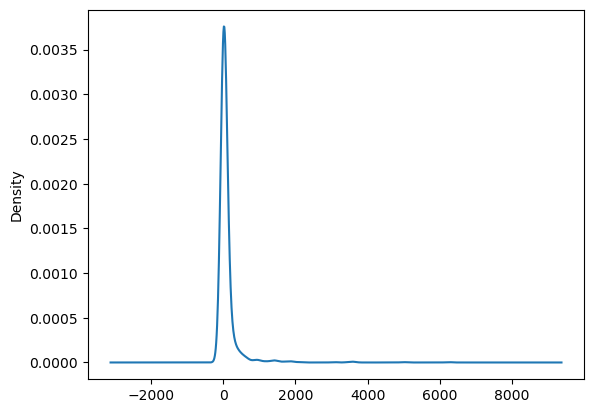

In [6]:
region_counts.plot.density()

In [7]:
region_counts.describe()

count    1239.000000
mean      102.202583
std       366.482829
min         1.000000
25%         4.000000
50%        12.000000
75%        58.000000
max      6246.000000
Name: region_1, dtype: float64

In [8]:
replace_region = list(region_counts[region_counts < 500].index)
replace_region

['Monterey County',
 'Barossa Valley',
 'South Eastern Australia',
 'Margaux',
 'Amador County',
 'Rías Baixas',
 'Mendocino',
 'Dundee Hills',
 'Mendocino County',
 'Colli Orientali del Friuli',
 'South Australia',
 'Oregon',
 'Oakville',
 'Sierra Foothills',
 'Franciacorta',
 'Haut-Médoc',
 'Conegliano Valdobbiadene Prosecco Superiore',
 'Virginia',
 'Livermore Valley',
 'Bordeaux Blanc',
 'Wahluke Slope',
 'Navarra',
 'Rueda',
 'Lake County',
 'Bolgheri',
 "Barbera d'Alba",
 'Pauillac',
 'Bordeaux',
 'Barossa',
 'North Coast',
 'Médoc',
 'Priorat',
 'Vino de la Tierra de Castilla',
 'Pomerol',
 "Vin de Pays d'Oc",
 'Uco Valley',
 'Valpolicella Superiore Ripasso',
 'Toro',
 'Bourgogne',
 'Arroyo Seco',
 'Sauternes',
 'Luján de Cuyo',
 'Rogue Valley',
 "Barbera d'Asti",
 'Howell Mountain',
 'Meursault',
 'Chehalem Mountains',
 'Rosso di Montalcino',
 'Clare Valley',
 'El Dorado',
 'Valpolicella Classico Superiore Ripasso',
 "Montepulciano d'Abruzzo",
 'Saint-Estèphe',
 'Saint-Julien',

In [9]:
for i in replace_region:
    wine_df.region_1 = wine_df.region_1.replace(i,"Other")

region_counts = wine_df.region_1.value_counts()



<AxesSubplot: ylabel='Density'>

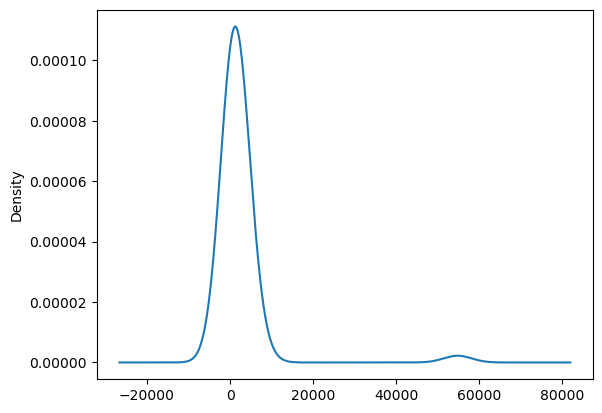

In [10]:
region_counts.plot.density()

In [11]:
winery_counts=wine_df.winery.value_counts()
winery_counts

Williams Selyem          374
Testarossa               277
DFJ Vinhos               258
Chateau Ste. Michelle    226
Columbia Crest           217
                        ... 
Château Magondeau          1
Château Haut-Lansac        1
Anko                       1
Alessandro Veglio          1
Fullerton                  1
Name: winery, Length: 14897, dtype: int64

<AxesSubplot: ylabel='Density'>

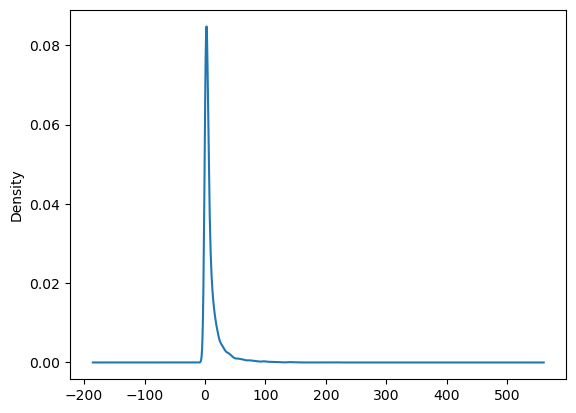

In [12]:
winery_counts.plot.density()

In [13]:
winery_counts.describe()

count    14897.000000
mean        10.192858
std         17.394968
min          1.000000
25%          2.000000
50%          4.000000
75%         11.000000
max        374.000000
Name: winery, dtype: float64

In [14]:
replace_winery = list(winery_counts[winery_counts < 30].index)
replace_winery

['Ruggeri & C.',
 'Kana',
 'Valdo',
 'Conceito Vinhos',
 'Huber',
 'Francis Coppola',
 'Burmester',
 'Castello di Amorosa',
 'Domaine Bruno Clair',
 "Quinta de Sant'Ana",
 'Belhurst',
 'Belle Glos',
 'Feudo Montoni',
 'BOND',
 'Fiuza',
 'Gritsch Mauritiushof',
 'Laird',
 'Portal Del Alto',
 'Rivetto',
 'Big Basin',
 'Seven of Hearts',
 'St. Clement',
 'Nobilo',
 'Fort Ross',
 'Château Malartic-Lagravière',
 'Casa do Valle',
 'Hawley',
 'Deutz',
 'San Rustico',
 'Lincourt',
 'West Cape Howe',
 'Dogwood',
 'Davis Bynum',
 'Gordon Brothers',
 'Warwick',
 'Cowhorn',
 'Boedecker Cellars',
 'Christian Lazo',
 'Corley',
 'Villa Mt. Eden',
 'Máté',
 'Alvaro Castro',
 'Peters Family',
 'Folie à Deux',
 'Shingleback',
 'Feudi di San Marzano',
 'Ruca Malen',
 'Escarpment',
 'William Cole',
 'Sella & Mosca',
 'Koyle',
 'Oak Knoll',
 'Rieflé',
 'Argiano',
 'Bota Box',
 'Allegrini',
 'Condado de Oriza',
 'Domaine Pouillon',
 'G. H. Mumm',
 'Stephen & Walker',
 'Poggio Nardone',
 'Drew',
 'J. Christo

In [15]:
for i in replace_winery:
    wine_df.winery = wine_df.winery.replace(i,"Other")

winery_counts = wine_df.winery.value_counts()

In [16]:
winery_counts

Other                    85150
Williams Selyem            374
Testarossa                 277
DFJ Vinhos                 258
Chateau Ste. Michelle      226
                         ...  
Carol Shelton               30
Merriam                     30
Knipser                     30
Borra                       30
Finca Allende               30
Name: winery, Length: 1185, dtype: int64

In [17]:
wine_df.dropna(inplace=True)

In [18]:
wine_df = wine_df.drop(columns=['designation'])

In [19]:
# def get_adjectives(text):
#     tokenized = nltk.word_tokenize(str(text)) 
#     tagged = nltk.pos_tag(tokenized)
#     adjectives = [word for word, pos in tagged if pos.startswith('JJ')]
#     return adjectives

In [20]:
# wine_df['adjectives'] = wine_df['description'].apply(get_adjectives)

In [21]:
word_list = ['full bodied','earthy','savory','herbaceous','minerally','toasty','oaky',
             'spicy','flabby','supple','balanced','sweet','aerated','buttery','fruity']

In [22]:
def check_words(row):
    for word in word_list:
        if word in row:
            return word
    return 'none'

In [23]:
wine_df['adjectives'] = wine_df['description'].apply(check_words)

In [24]:
wine_df = wine_df.drop(columns=['description'])

In [25]:
wine_df.tail()

,country,points,price,province,region_1,region_2,variety,winery,adjectives
151835,US,87.0,30.0,Texas,Other,None,Nero d'Avola,Other,none
151836,US,87.0,18.0,Texas,Other,None,Roussanne,Other,none
151840,Argentina,87.0,30.0,Mendoza Province,Other,None,Bordeaux-style Red Blend,Other,earthy
151841,France,87.0,23.0,France Other,Other,None,Cinsault,Other,sweet
151842,US,87.0,18.0,Oregon,Willamette Valley,Willamette Valley,Rosé,Other,none


In [26]:
for col in wine_df:
    print(wine_df[col].dtype)

object
float64
float64
object
object
object
object
object
object


In [27]:
enc = OneHotEncoder(sparse= False)

In [28]:
for col in wine_df:
    if wine_df[col].dtype == 'object':
        enc_col = wine_df[col]
        wine_df = wine_df.drop(columns=col)
        enc_col2 = pd.DataFrame(enc.fit_transform(enc_col.values.reshape(-1,1)))
        enc_col2.columns = enc.get_feature_names([col])
        wine_df = wine_df.merge(enc_col2,left_index=True,right_index=True)
        
        

/Users/jordanravelo/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jordanravelo/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jordanravelo/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jordanravelo/opt/anaconda3/envs/mlenv/l

In [29]:
wine_df.head()

,points,price,country_Argentina,country_Australia,country_Canada,country_France,country_Italy,country_Spain,country_US,province_Alsace,...,adjectives_full bodied,adjectives_herbaceous,adjectives_minerally,adjectives_none,adjectives_oaky,adjectives_savory,adjectives_spicy,adjectives_supple,adjectives_sweet,adjectives_toasty
0,96.0,235.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,96.0,110.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,96.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,96.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,95.0,66.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
for col in wine_df:
    print(col)

points
price
country_Argentina
country_Australia
country_Canada
country_France
country_Italy
country_Spain
country_US
province_Alsace
province_Andalucia
province_Arizona
province_Australia Other
province_Beaujolais
province_Bordeaux
province_British Columbia
province_Burgundy
province_California
province_Catalonia
province_Central Italy
province_Central Spain
province_Champagne
province_Colorado
province_France Other
province_Galicia
province_Idaho
province_Iowa
province_Italy Other
province_Languedoc-Roussillon
province_Levante
province_Loire Valley
province_Lombardy
province_Massachusetts
province_Mendoza Province
province_Michigan
province_Missouri
province_New Jersey
province_New Mexico
province_New South Wales
province_New York
province_North Carolina
province_Northeastern Italy
province_Northern Spain
province_Northwestern Italy
province_Ohio
province_Ontario
province_Oregon
province_Other
province_Pennsylvania
province_Piedmont
province_Provence
province_Rhône Valley
province_Si

In [31]:
y = wine_df['points']
X = wine_df.drop(columns='points')

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.fit_transform(X_test)

In [34]:
print(len(X_train_scaled[0]))

825


In [35]:
number_input_features = len(X_train_scaled[0])
hidden_layers_1 = 750
hidden_layers_list = [250]

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=hidden_layers_1, input_dim=number_input_features, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
nn.add(tf.keras.layers.Dropout(0.5))
for i in hidden_layers_list:
    nn.add(tf.keras.layers.Dense(units=i, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
    nn.add(tf.keras.layers.Dropout(0.5))

nn.add(tf.keras.layers.Dense(units=1, activation='relu'))





2023-02-23 19:50:49.202174: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
checkpoint = ModelCheckpoint('best_weights.h5',save_best_only=True,save_weights_only = True,monitor = 'val_mae',verbose = 1)

In [37]:
nn.compile(loss = 'mae',optimizer ='adam',metrics=['mae'])

In [38]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 750)               619500    
                                                                 
 dropout (Dropout)           (None, 750)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               187750    
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 251       
                                                                 
Total params: 807,501
Trainable params: 807,501
Non-trainable params: 0
_________________________________________________________________


In [39]:
early_stop = EarlyStopping(monitor='val_mae',patience = 5, verbose = 1)

In [40]:
start_time = time.time()
for i in range(1,102):
    if i >= 75 and i < 85:
        early_stop = EarlyStopping(monitor='val_mae',patience = 3, verbose = 1)
    elif i >= 85:
        early_stop = EarlyStopping(monitor='val_mae',patience = 1, verbose = 1)
    nn.fit(X_train_scaled,y_train,epochs=10000,validation_data=(X_test,y_test),callbacks=[checkpoint,early_stop])
    if i % 2 != 0:
        print(f"loaded Weights {i}")
        nn.load_weights('best_weights.h5')
    else:
        print(f"Random Weights {i}")

end_time = time.time()

Epoch 1/10000
21/30 [====================>.........] - ETA: 0s - loss: 289.0946 - mae: 80.1552
Epoch 1: val_mae improved from inf to 41.17283, saving model to best_weights.h5
30/30 [==============================] - 1s 11ms/step - loss: 265.3566 - mae: 76.9109 - val_loss: 156.2435 - val_mae: 41.1728
Epoch 2/10000
24/30 [=======================>......] - ETA: 0s - loss: 132.5944 - mae: 42.6150
Epoch 2: val_mae did not improve from 41.17283
30/30 [==============================] - 0s 6ms/step - loss: 125.1015 - mae: 37.9232 - val_loss: 154.8013 - val_mae: 83.4941
Epoch 3/10000
29/30 [============================>.] - ETA: 0s - loss: 74.4803 - mae: 15.2081
Epoch 3: val_mae did not improve from 41.17283
30/30 [==============================] - 0s 7ms/step - loss: 74.4652 - mae: 15.2002 - val_loss: 159.4169 - val_mae: 106.8218
Epoch 4/10000
22/30 [=====================>........] - ETA: 0s - loss: 63.5079 - mae: 13.5318
Epoch 4: val_mae did not improve from 41.17283
30/30 [==================

Epoch 6/10000
30/30 [==============================] - ETA: 0s - loss: 26.3058 - mae: 9.4658
Epoch 6: val_mae did not improve from 15.54472
30/30 [==============================] - 0s 7ms/step - loss: 26.3058 - mae: 9.4658 - val_loss: 55.9338 - val_mae: 39.2971
Epoch 7/10000
23/30 [======================>.......] - ETA: 0s - loss: 26.4724 - mae: 9.9444 
Epoch 7: val_mae did not improve from 15.54472
30/30 [==============================] - 0s 6ms/step - loss: 26.2286 - mae: 9.7746 - val_loss: 56.3569 - val_mae: 40.2109
Epoch 8/10000
20/30 [===================>..........] - ETA: 0s - loss: 25.4969 - mae: 9.3446
Epoch 8: val_mae did not improve from 15.54472
30/30 [==============================] - 0s 6ms/step - loss: 25.5643 - mae: 9.5300 - val_loss: 59.0053 - val_mae: 42.9605
Epoch 8: early stopping
loaded Weights 3
Epoch 1/10000
24/30 [=======================>......] - ETA: 0s - loss: 28.0981 - mae: 9.9046 
Epoch 1: val_mae improved from 15.54472 to 13.83073, saving model to best_weig

23/30 [======================>.......] - ETA: 0s - loss: 23.4071 - mae: 8.4068
Epoch 5: val_mae did not improve from 11.56951
30/30 [==============================] - 0s 6ms/step - loss: 23.1315 - mae: 8.1596 - val_loss: 39.4055 - val_mae: 24.7991
Epoch 6/10000
25/30 [========================>.....] - ETA: 0s - loss: 24.6167 - mae: 9.4359 
Epoch 6: val_mae did not improve from 11.56951
30/30 [==============================] - 0s 5ms/step - loss: 24.4121 - mae: 9.2648 - val_loss: 45.8516 - val_mae: 30.6850
Epoch 6: early stopping
loaded Weights 7
Epoch 1/10000
25/30 [========================>.....] - ETA: 0s - loss: 24.9842 - mae: 9.2548
Epoch 1: val_mae did not improve from 11.56951
30/30 [==============================] - 0s 6ms/step - loss: 25.0116 - mae: 9.2550 - val_loss: 31.5903 - val_mae: 16.0414
Epoch 2/10000
26/30 [=========================>....] - ETA: 0s - loss: 25.3685 - mae: 9.5046 
Epoch 2: val_mae improved from 11.56951 to 10.55628, saving model to best_weights.h5
30/30 [

24/30 [=======================>......] - ETA: 0s - loss: 22.6937 - mae: 8.8667
Epoch 6: val_mae did not improve from 8.60538
30/30 [==============================] - 0s 6ms/step - loss: 22.5140 - mae: 8.7130 - val_loss: 28.4332 - val_mae: 14.7667
Epoch 7/10000
24/30 [=======================>......] - ETA: 0s - loss: 22.5910 - mae: 8.4385
Epoch 7: val_mae did not improve from 8.60538
30/30 [==============================] - 0s 6ms/step - loss: 22.4772 - mae: 8.3549 - val_loss: 49.9009 - val_mae: 35.5480
Epoch 8/10000
25/30 [========================>.....] - ETA: 0s - loss: 23.1337 - mae: 9.2739
Epoch 8: val_mae did not improve from 8.60538
30/30 [==============================] - 0s 5ms/step - loss: 22.9191 - mae: 9.1197 - val_loss: 41.6038 - val_mae: 28.2794
Epoch 9/10000
26/30 [=========================>....] - ETA: 0s - loss: 21.7299 - mae: 8.4689
Epoch 9: val_mae did not improve from 8.60538
30/30 [==============================] - 0s 5ms/step - loss: 21.5460 - mae: 8.3066 - val_los

Epoch 2/10000
25/30 [========================>.....] - ETA: 0s - loss: 23.3356 - mae: 8.7705
Epoch 2: val_mae did not improve from 8.60538
30/30 [==============================] - 0s 5ms/step - loss: 23.3371 - mae: 8.8232 - val_loss: 23.9544 - val_mae: 9.8282
Epoch 3/10000
25/30 [========================>.....] - ETA: 0s - loss: 23.7263 - mae: 9.4085 
Epoch 3: val_mae did not improve from 8.60538
30/30 [==============================] - 0s 5ms/step - loss: 23.5401 - mae: 9.2504 - val_loss: 24.9903 - val_mae: 11.0913
Epoch 4/10000
26/30 [=========================>....] - ETA: 0s - loss: 23.0151 - mae: 9.0034
Epoch 4: val_mae did not improve from 8.60538
30/30 [==============================] - 0s 5ms/step - loss: 23.0161 - mae: 9.0188 - val_loss: 25.9759 - val_mae: 12.1696
Epoch 5/10000
26/30 [=========================>....] - ETA: 0s - loss: 22.2155 - mae: 8.6619
Epoch 5: val_mae did not improve from 8.60538
30/30 [==============================] - 0s 5ms/step - loss: 22.3110 - mae: 8.

Epoch 10: early stopping
loaded Weights 17
Epoch 1/10000
24/30 [=======================>......] - ETA: 0s - loss: 21.1237 - mae: 8.0393
Epoch 1: val_mae did not improve from 5.75807
30/30 [==============================] - 0s 6ms/step - loss: 20.9686 - mae: 7.9543 - val_loss: 28.6800 - val_mae: 16.1397
Epoch 2/10000
25/30 [========================>.....] - ETA: 0s - loss: 20.9211 - mae: 8.0257
Epoch 2: val_mae did not improve from 5.75807
30/30 [==============================] - 0s 5ms/step - loss: 20.9150 - mae: 8.0454 - val_loss: 33.9217 - val_mae: 21.3195
Epoch 3/10000
26/30 [=========================>....] - ETA: 0s - loss: 20.7238 - mae: 8.2126
Epoch 3: val_mae did not improve from 5.75807
30/30 [==============================] - 0s 5ms/step - loss: 20.7938 - mae: 8.3219 - val_loss: 37.9292 - val_mae: 25.7914
Epoch 4/10000
26/30 [=========================>....] - ETA: 0s - loss: 20.7312 - mae: 8.0672
Epoch 4: val_mae did not improve from 5.75807
30/30 [============================

Epoch 19: early stopping
Random Weights 20
Epoch 1/10000
25/30 [========================>.....] - ETA: 0s - loss: 19.1912 - mae: 7.7394
Epoch 1: val_mae did not improve from 5.75807
30/30 [==============================] - 0s 6ms/step - loss: 19.1531 - mae: 7.7389 - val_loss: 20.9142 - val_mae: 10.0817
Epoch 2/10000
26/30 [=========================>....] - ETA: 0s - loss: 20.5676 - mae: 9.2465 
Epoch 2: val_mae did not improve from 5.75807
30/30 [==============================] - 0s 5ms/step - loss: 20.4024 - mae: 9.1109 - val_loss: 19.0022 - val_mae: 8.0484
Epoch 3/10000
27/30 [==========================>...] - ETA: 0s - loss: 19.6569 - mae: 8.1378
Epoch 3: val_mae did not improve from 5.75807
30/30 [==============================] - 0s 5ms/step - loss: 19.6447 - mae: 8.1320 - val_loss: 19.9216 - val_mae: 8.6736
Epoch 4/10000
26/30 [=========================>....] - ETA: 0s - loss: 19.6530 - mae: 8.1648
Epoch 4: val_mae did not improve from 5.75807
30/30 [=============================

25/30 [========================>.....] - ETA: 0s - loss: 16.2848 - mae: 7.0819
Epoch 1: val_mae did not improve from 3.27518
30/30 [==============================] - 0s 6ms/step - loss: 16.3032 - mae: 7.1238 - val_loss: 15.1604 - val_mae: 6.3042
Epoch 2/10000
25/30 [========================>.....] - ETA: 0s - loss: 17.9063 - mae: 8.2161
Epoch 2: val_mae did not improve from 3.27518
30/30 [==============================] - 0s 5ms/step - loss: 17.8400 - mae: 8.1051 - val_loss: 14.5751 - val_mae: 4.7475
Epoch 3/10000
26/30 [=========================>....] - ETA: 0s - loss: 17.8120 - mae: 7.5984
Epoch 3: val_mae did not improve from 3.27518
30/30 [==============================] - 0s 5ms/step - loss: 17.6750 - mae: 7.5019 - val_loss: 28.4095 - val_mae: 18.5974
Epoch 4/10000
27/30 [==========================>...] - ETA: 0s - loss: 17.4529 - mae: 7.8383
Epoch 4: val_mae did not improve from 3.27518
30/30 [==============================] - 0s 5ms/step - loss: 17.3602 - mae: 7.7670 - val_loss:

Epoch 11: early stopping
Random Weights 26
Epoch 1/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.7854 - mae: 7.3439
Epoch 1: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 6ms/step - loss: 15.7396 - mae: 7.3059 - val_loss: 39.7101 - val_mae: 31.4086
Epoch 2/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.7140 - mae: 7.1656
Epoch 2: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.7523 - mae: 7.2244 - val_loss: 17.9323 - val_mae: 9.6375
Epoch 3/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.9186 - mae: 7.4253
Epoch 3: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.8733 - mae: 7.4311 - val_loss: 54.1796 - val_mae: 45.9390
Epoch 4/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.9005 - mae: 7.7922
Epoch 4: val_mae did not improve from 2.49790
30/30 [=============================

Epoch 4/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.7895 - mae: 6.9348
Epoch 4: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.7076 - mae: 6.8916 - val_loss: 32.6183 - val_mae: 23.8841
Epoch 5/10000
25/30 [========================>.....] - ETA: 0s - loss: 16.6498 - mae: 7.8369
Epoch 5: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 16.4891 - mae: 7.6961 - val_loss: 18.8012 - val_mae: 10.2095
Epoch 6/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.9837 - mae: 7.4953
Epoch 6: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.8299 - mae: 7.3948 - val_loss: 22.1594 - val_mae: 14.1286
Epoch 7/10000
26/30 [=========================>....] - ETA: 0s - loss: 14.6491 - mae: 6.5347
Epoch 7: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 14.6978 - mae: 6.

Epoch 6/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.6158 - mae: 7.5092
Epoch 6: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.4634 - mae: 7.3769 - val_loss: 19.1154 - val_mae: 11.2363
Epoch 7/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.9712 - mae: 6.9215
Epoch 7: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 14.8997 - mae: 6.8600 - val_loss: 34.8272 - val_mae: 26.9195
Epoch 8/10000
26/30 [=========================>....] - ETA: 0s - loss: 14.2109 - mae: 6.3677
Epoch 8: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 14.1139 - mae: 6.3098 - val_loss: 13.6252 - val_mae: 6.2848
Epoch 9/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.1823 - mae: 7.2389
Epoch 9: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.1694 - mae: 7.2

Epoch 4/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.3912 - mae: 7.0924
Epoch 4: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.3304 - mae: 7.0586 - val_loss: 30.9257 - val_mae: 22.6457
Epoch 5/10000
25/30 [========================>.....] - ETA: 0s - loss: 16.1867 - mae: 7.6912
Epoch 5: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 16.1279 - mae: 7.6506 - val_loss: 38.8843 - val_mae: 30.6530
Epoch 6/10000
26/30 [=========================>....] - ETA: 0s - loss: 15.2679 - mae: 6.9207
Epoch 6: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.1693 - mae: 6.8408 - val_loss: 25.2581 - val_mae: 17.0744
Epoch 7/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.1611 - mae: 6.9375
Epoch 7: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.0714 - mae: 6.

24/30 [=======================>......] - ETA: 0s - loss: 16.0508 - mae: 7.3391
Epoch 8: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.7994 - mae: 7.1077 - val_loss: 24.5107 - val_mae: 15.9665
Epoch 8: early stopping
Random Weights 38
Epoch 1/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.2600 - mae: 6.7823
Epoch 1: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 6ms/step - loss: 15.1680 - mae: 6.7258 - val_loss: 26.0256 - val_mae: 17.8202
Epoch 2/10000
27/30 [==========================>...] - ETA: 0s - loss: 15.1383 - mae: 6.9899
Epoch 2: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.1365 - mae: 6.9974 - val_loss: 16.9623 - val_mae: 9.0390
Epoch 3/10000
26/30 [=========================>....] - ETA: 0s - loss: 14.9070 - mae: 6.6748
Epoch 3: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/ste

Epoch 3/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.9788 - mae: 7.0891
Epoch 3: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.9175 - mae: 7.0461 - val_loss: 59.7796 - val_mae: 50.8145
Epoch 4/10000
25/30 [========================>.....] - ETA: 0s - loss: 16.4250 - mae: 7.4265
Epoch 4: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 16.3558 - mae: 7.3991 - val_loss: 36.6704 - val_mae: 28.0984
Epoch 5/10000
26/30 [=========================>....] - ETA: 0s - loss: 16.5437 - mae: 7.2825
Epoch 5: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 16.5063 - mae: 7.2388 - val_loss: 40.0774 - val_mae: 30.6450
Epoch 6/10000
26/30 [=========================>....] - ETA: 0s - loss: 16.4194 - mae: 7.0731
Epoch 6: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 16.3984 - mae: 7.

Epoch 3/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.6129 - mae: 6.7899
Epoch 3: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.4354 - mae: 6.6508 - val_loss: 20.3741 - val_mae: 11.9429
Epoch 4/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.8397 - mae: 7.1803
Epoch 4: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.7407 - mae: 7.1094 - val_loss: 26.7357 - val_mae: 18.3440
Epoch 5/10000
26/30 [=========================>....] - ETA: 0s - loss: 15.1108 - mae: 6.9916
Epoch 5: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.0641 - mae: 6.9775 - val_loss: 29.5649 - val_mae: 21.6599
Epoch 6/10000
27/30 [==========================>...] - ETA: 0s - loss: 16.1393 - mae: 8.1305
Epoch 6: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 16.1220 - mae: 8.

Epoch 7/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.7677 - mae: 7.2870
Epoch 7: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.8244 - mae: 7.3271 - val_loss: 24.4912 - val_mae: 15.9031
Epoch 8/10000
25/30 [========================>.....] - ETA: 0s - loss: 16.0082 - mae: 7.4790
Epoch 8: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.9199 - mae: 7.4128 - val_loss: 16.2392 - val_mae: 8.1137
Epoch 9/10000
26/30 [=========================>....] - ETA: 0s - loss: 15.9441 - mae: 7.3887
Epoch 9: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.9586 - mae: 7.4035 - val_loss: 25.8800 - val_mae: 17.2857
Epoch 9: early stopping
Random Weights 50
Epoch 1/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.7753 - mae: 7.3252
Epoch 1: val_mae did not improve from 2.49790
30/30 [==============================

Epoch 4/10000
25/30 [========================>.....] - ETA: 0s - loss: 16.0099 - mae: 7.0186
Epoch 4: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 16.0001 - mae: 6.9962 - val_loss: 31.1633 - val_mae: 21.9864
Epoch 5/10000
25/30 [========================>.....] - ETA: 0s - loss: 17.1774 - mae: 7.9588
Epoch 5: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 16.9912 - mae: 7.7912 - val_loss: 13.0108 - val_mae: 4.1009
Epoch 6/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.7513 - mae: 6.9334
Epoch 6: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.5904 - mae: 6.8182 - val_loss: 12.1329 - val_mae: 3.7165
Epoch 7/10000
26/30 [=========================>....] - ETA: 0s - loss: 15.9204 - mae: 7.1768
Epoch 7: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.9136 - mae: 7.18

Epoch 5/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.6043 - mae: 6.7536
Epoch 5: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 14.5827 - mae: 6.7688 - val_loss: 12.5514 - val_mae: 5.1012
Epoch 6/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.9690 - mae: 8.0238
Epoch 6: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 15.8170 - mae: 7.8659 - val_loss: 25.1383 - val_mae: 17.1024
Epoch 7/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.8566 - mae: 6.6594
Epoch 7: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 14.8051 - mae: 6.6284 - val_loss: 17.9953 - val_mae: 9.9946
Epoch 8/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.7921 - mae: 6.8682
Epoch 8: val_mae did not improve from 2.49790
30/30 [==============================] - 0s 5ms/step - loss: 14.6660 - mae: 6.79

Epoch 7/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.4071 - mae: 7.3522
Epoch 7: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 15.3308 - mae: 7.3092 - val_loss: 19.0570 - val_mae: 11.2833
Epoch 8/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.9070 - mae: 7.1527
Epoch 8: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 14.7648 - mae: 7.0403 - val_loss: 19.4230 - val_mae: 12.0807
Epoch 9/10000
26/30 [=========================>....] - ETA: 0s - loss: 15.3971 - mae: 7.8359
Epoch 9: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 15.2672 - mae: 7.7165 - val_loss: 16.9469 - val_mae: 9.5586
Epoch 10/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.6091 - mae: 6.9845
Epoch 10: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 14.5163 - mae: 6

Epoch 6: early stopping
Random Weights 62
Epoch 1/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.0011 - mae: 6.6406
Epoch 1: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 6ms/step - loss: 14.8662 - mae: 6.5479 - val_loss: 27.6194 - val_mae: 19.6258
Epoch 2/10000
26/30 [=========================>....] - ETA: 0s - loss: 15.1605 - mae: 7.1576
Epoch 2: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 15.1406 - mae: 7.1585 - val_loss: 37.0370 - val_mae: 29.3136
Epoch 3/10000
27/30 [==========================>...] - ETA: 0s - loss: 14.4050 - mae: 6.5654
Epoch 3: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 14.3622 - mae: 6.5301 - val_loss: 17.6099 - val_mae: 9.9737
Epoch 4/10000
26/30 [=========================>....] - ETA: 0s - loss: 15.7560 - mae: 7.6479
Epoch 4: val_mae did not improve from 1.82909
30/30 [==============================

Epoch 6/10000
25/30 [========================>.....] - ETA: 0s - loss: 13.2552 - mae: 6.5568
Epoch 6: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 13.1973 - mae: 6.5476 - val_loss: 16.6316 - val_mae: 10.3602
Epoch 7/10000
25/30 [========================>.....] - ETA: 0s - loss: 12.9616 - mae: 6.5338
Epoch 7: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 12.9327 - mae: 6.5223 - val_loss: 22.5814 - val_mae: 16.3369
Epoch 7: early stopping
loaded Weights 65
Epoch 1/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.8992 - mae: 6.6303
Epoch 1: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 6ms/step - loss: 14.9522 - mae: 6.7105 - val_loss: 13.5495 - val_mae: 5.5621
Epoch 2/10000
26/30 [=========================>....] - ETA: 0s - loss: 15.2642 - mae: 7.0377
Epoch 2: val_mae did not improve from 1.82909
30/30 [==============================

Epoch 6/10000
25/30 [========================>.....] - ETA: 0s - loss: 16.4161 - mae: 7.7977
Epoch 6: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 16.4331 - mae: 7.8317 - val_loss: 17.5307 - val_mae: 9.1664
Epoch 7/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.4100 - mae: 7.0649
Epoch 7: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 15.2307 - mae: 6.9307 - val_loss: 13.8367 - val_mae: 5.9311
Epoch 8/10000
26/30 [=========================>....] - ETA: 0s - loss: 15.0271 - mae: 7.1004
Epoch 8: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 14.9548 - mae: 7.0559 - val_loss: 17.3110 - val_mae: 9.7329
Epoch 9/10000
26/30 [=========================>....] - ETA: 0s - loss: 14.6683 - mae: 6.8288
Epoch 9: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 14.6156 - mae: 6.774

Epoch 7/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.5325 - mae: 7.1552
Epoch 7: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 14.4831 - mae: 7.1114 - val_loss: 25.7792 - val_mae: 18.3621
Epoch 8/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.2254 - mae: 6.9368
Epoch 8: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 14.0223 - mae: 6.7831 - val_loss: 23.9270 - val_mae: 17.0932
Epoch 9/10000
25/30 [========================>.....] - ETA: 0s - loss: 13.3623 - mae: 6.3863
Epoch 9: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 13.4038 - mae: 6.4590 - val_loss: 22.3641 - val_mae: 15.6271
Epoch 10/10000
25/30 [========================>.....] - ETA: 0s - loss: 13.4644 - mae: 6.5473
Epoch 10: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 13.5435 - mae: 

Epoch 6/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.5191 - mae: 7.1220
Epoch 6: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 14.5515 - mae: 7.1810 - val_loss: 29.9644 - val_mae: 22.6666
Epoch 7/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.6169 - mae: 7.1335
Epoch 7: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 14.5349 - mae: 7.0289 - val_loss: 23.6910 - val_mae: 16.0885
Epoch 8/10000
26/30 [=========================>....] - ETA: 0s - loss: 14.6876 - mae: 6.8190
Epoch 8: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 14.5392 - mae: 6.6931 - val_loss: 29.6912 - val_mae: 22.0654
Epoch 8: early stopping
Random Weights 74
Epoch 1/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.7570 - mae: 7.0193
Epoch 1: val_mae did not improve from 1.82909
30/30 [=============================

Epoch 7: early stopping
Random Weights 78
Epoch 1/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.6192 - mae: 6.9297
Epoch 1: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 6ms/step - loss: 14.5840 - mae: 6.9223 - val_loss: 16.1487 - val_mae: 8.7413
Epoch 2/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.6251 - mae: 7.0546
Epoch 2: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 14.7601 - mae: 7.1702 - val_loss: 19.5127 - val_mae: 11.8484
Epoch 3/10000
25/30 [========================>.....] - ETA: 0s - loss: 14.4688 - mae: 6.6696
Epoch 3: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 14.4369 - mae: 6.6598 - val_loss: 12.0493 - val_mae: 4.4557
Epoch 4/10000
26/30 [=========================>....] - ETA: 0s - loss: 14.5575 - mae: 6.7329
Epoch 4: val_mae did not improve from 1.82909
30/30 [==============================]

24/30 [=======================>......] - ETA: 0s - loss: 15.7415 - mae: 7.2973
Epoch 1: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 6ms/step - loss: 15.6630 - mae: 7.2446 - val_loss: 11.9157 - val_mae: 3.9247
Epoch 2/10000
25/30 [========================>.....] - ETA: 0s - loss: 16.6102 - mae: 8.2104
Epoch 2: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 16.3459 - mae: 7.9443 - val_loss: 16.8308 - val_mae: 8.4350
Epoch 2: early stopping
Random Weights 86
Epoch 1/10000
26/30 [=========================>....] - ETA: 0s - loss: 15.7078 - mae: 7.2161
Epoch 1: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 6ms/step - loss: 15.5437 - mae: 7.0737 - val_loss: 31.8004 - val_mae: 23.5739
Epoch 2/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.0479 - mae: 6.8170
Epoch 2: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step

Epoch 2/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.4591 - mae: 7.1565
Epoch 2: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 15.3936 - mae: 7.1155 - val_loss: 16.6637 - val_mae: 8.7439
Epoch 3/10000
26/30 [=========================>....] - ETA: 0s - loss: 16.7194 - mae: 8.2462
Epoch 3: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 5ms/step - loss: 16.8244 - mae: 8.3492 - val_loss: 26.9044 - val_mae: 18.4038
Epoch 3: early stopping
Random Weights 96
Epoch 1/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.7839 - mae: 7.2665
Epoch 1: val_mae did not improve from 1.82909
30/30 [==============================] - 0s 6ms/step - loss: 15.6504 - mae: 7.1682 - val_loss: 19.7868 - val_mae: 11.6087
Epoch 2/10000
25/30 [========================>.....] - ETA: 0s - loss: 15.2123 - mae: 7.0419
Epoch 2: val_mae did not improve from 1.82909
30/30 [==============================

In [41]:
loss,accuracy = nn.evaluate(X_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 10.1610 - mae: 1.8291


In [42]:
total_time = end_time - start_time

print(f'{total_time} seconds')

139.3849868774414 seconds


In [43]:
def create_model():
    number_input_features = len(X_train_scaled[0])
    hidden_layers_1 = 750
    hidden_layers_list = [250]

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(units=hidden_layers_1, input_dim=number_input_features, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
    model.add(tf.keras.layers.Dropout(0.5))
    for i in hidden_layers_list:
        model.add(tf.keras.layers.Dense(units=i, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
        model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(units=1, activation='relu'))
    return model


In [44]:
model_best = create_model()

In [45]:
model_best.load_weights('best_weights.h5')

In [47]:
model_best.compile(loss = 'mae',optimizer ='adam',metrics=['mae'])

In [48]:
loss,accuracy = model_best.evaluate(X_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 10.1610 - mae: 1.8291


In [49]:
y_pred = model_best.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [50]:
data = {'Predicted':y_pred.ravel(),
       'Actual':y_test.ravel()}

In [51]:
result = pd.DataFrame(data)

In [52]:
result['Predicted'] = result['Predicted'].round()

In [53]:
result

,Predicted,Actual
0,90.0,93.0
1,90.0,90.0
2,90.0,90.0
3,89.0,88.0
4,90.0,85.0
...,...,...
228,90.0,90.0
229,90.0,90.0
230,90.0,88.0
231,90.0,86.0


In [54]:
counter = 0
for i in range(len(result)):
    if result['Predicted'].iloc[i] == result['Actual'].iloc[i]:
        counter += 1

print(counter)

        

67
